In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


## 데이터 불러오기

In [4]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')

In [5]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


## One-hot encoding

In [7]:
df=pd.get_dummies(df, columns=['origin'], prefix='origin',)
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,18.0,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1,0,0


## Input/Output(Label) 나누기

In [8]:
from sklearn.model_selection import train_test_split
y = df.pop('mpg')
X = df

In [9]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

## 훈련/검증 데이터 나누기

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2)

## 데이터 정규화

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #평균이 0이고 분산이1이 되도록 정규화 (단위는 없어지고) 
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)


## 회귀모형 만들기

In [20]:
model = keras.Sequential()
model.add(layers.Dense(32, activation='relu',input_dim=train_X_scaled.shape[1]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                320       
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


## 모델 확인하기

In [21]:
history = model.fit(train_X_scaled, train_y, epochs=100, validation_data = (test_X_scaled, test_y), verbose = 1)

Epoch 1/100
10/10 [==============================] - 2s 39ms/step - loss: 572.4643 - mae: 22.5555 - mse: 572.4643 - val_loss: 617.1523 - val_mae: 23.1896 - val_mse: 617.1523
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 556.6657 - mae: 22.1324 - mse: 556.6657 - val_loss: 603.3137 - val_mae: 22.8414 - val_mse: 603.3137
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 543.7518 - mae: 21.7858 - mse: 543.7518 - val_loss: 590.1707 - val_mae: 22.4960 - val_mse: 590.1707
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 531.1810 - mae: 21.4340 - mse: 531.1810 - val_loss: 576.8611 - val_mae: 22.1417 - val_mse: 576.8611
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 518.0492 - mae: 21.0639 - mse: 518.0492 - val_loss: 562.5712 - val_mae: 21.7583 - val_mse: 562.5712
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 503.9754 - mae: 20.6608 - mse: 503.9754 - val_loss: 547.

## 모델 성능 플로팅하기

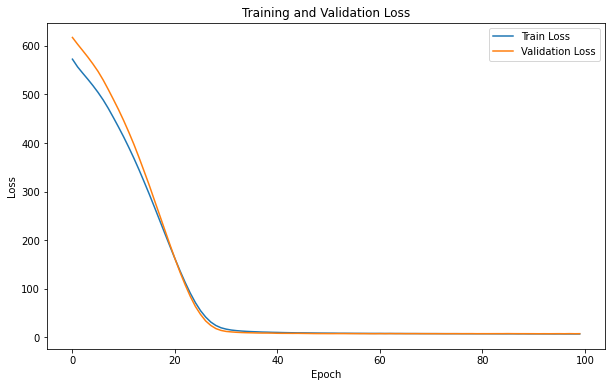

In [22]:
# 학습 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()